<a href="https://colab.research.google.com/github/mertcaneken/EclipseDemo/blob/master/DSAI302_Assignment_1_MertcanEken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **ASSIGNMENT 1 - Exploratory Data Analysis**
> #### **DSAI 302 Spring 2024**


Please write your name and student number.

>**Name**: Mertcan Eken
>
>**Student Number**: 2020205048

The full assignment is worth 100 points in total. Please write your answers within the correct exercise sections. This asssignment consists of two parts. The first part is about the famous Titanic dataset and the second one is about the Sleep Efficiency dataset. You will download the datasets using Kaggle API and start doing exploratory data analysis.


---

> # **PART 1 - E.D.A. on Titanic Dataset**

### **Dataset Description:**
In this assignment, you will perform an exploratory data analysis (EDA) on the Titanic dataset.

The Titanic dataset contains information about
the passengers who were on board the ill-fated maiden voyage of the RMS Titanic in April 1912. It includes various features that describe individual passengers, making it an excellent resource for understanding the factors that might have influenced survival rates.

Now check out the data dictionary below to get to know more about the dataset.

**Data Dictionary:**

Variable    | Definition	Key |Values|
------------|-------------------|----|
PassangerID |A unique identifier for each passenger|
survival	|Indicates whether the passenger survived|	0 = No, 1 = Yes
pclass	    |The passenger class, serving as a proxy for socio-economic status.|	1 = 1st, 2 = 2nd, 3 = 3rd
Name|The name of the passenger.|
sex	        |The gender of the passenger	|male or female
Age	        |The age of the passenger.|
sibsp	    |The number of siblings or spouses the passenger had aboard the Titanic.
parch	    |The number of parents or children the passenger had aboard the ship.
ticket	    |The ticket number of the passenger.
fare	    |The amount of money the passenger paid for the ticket.
cabin	    |The cabin number where the passenger stayed.
embarked	|The port where the passenger embarked on the Titanic.|	C = Cherbourg, Q = Queenstown, S = Southampton

## **PART 1.1 - Loading and Cleaning The Data (15 Points)**




First, fetch the dataset from Kaggle. Make sure that your "KAGGLE_KEY" AND "KAGGLE_USERNAME" keys are stored and has notebook access in the secrets tab of Google Colab.

In [ ]:
from google.colab import  userdata
import os

os.environ["KAGGLE_USERNAME"] = 'mertcaneken'
os.environ["KAGGLE_KEY"] = '52ba35f6b0ba9b29bcb9b29f5d54e591'

In [ ]:
! kaggle competitions download 'titanic' -f train.csv

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 5.17MB/s]


Your task is to perform an EDA on this dataset to uncover insights into who the passengers were and what factors contributed to their survival or demise. You will begin by cleaning the data, handling missing values, and then proceed to analyze different aspects of the dataset through summary statistics and visualizations. Look into distributions of key variables, relationships between survival and other features, and patterns that emerge from the data. This comprehensive analysis will provide a deeper understanding of the tragedy and highlight the socio-economic and demographic factors that played a role in survival outcomes.

Now let's start our exploratory data analysis.

1. (1 points) First import NumPy, Pandas, Matplotlib, Seaborn and other necesarry libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. (1 points) You should see train.csv on the files tab. Read the .csv file and save it into a Pandas DataFrame. Use `pd.read_csv()` function.

In [ ]:
df = pd.read_csv('train.csv')

3. (1 points) First, take a general look at the data. How many rows and columns does this dataset have?  In order to get some insight into the data first display the first 12 rows of the DataFrame with `.head()`




In [ ]:
count_rows, count_columns = df.shape
print('Rows:', count_rows)
print('Columns:', count_columns)
df.head(12)

Rows: 891
Columns: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


4. (1 points) What are the data types of the columns? Use Pandas library's `.info()` function to get more information about the DataFrame columns. Also, display descriptive statistics of numerical columns. Use `.describe()` function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 5. (1 points) Are there any null entries that you have to deal with? Use .isnull() function with .sum() to see the total number of nulls in each column.
 print(df.isnull().sum())

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


6. (1 points) Comment on the minimum values of the features. How does the minimum value of Survived (which is zero) differ from the that of Fare (again zero)? Is it meaningful to calculate the descriptive statistics for categorical variables?

In [ ]:
#The minimum value of 'Survived' indicates non-survivors,
#while the minimum value of 'Fare' suggests possible missing or incomplete data;
#descriptive statistics are not meaningful for categorical variables.

7. (1 points) The first step is dealing with null entries. There are three columns that have null entries: Age, Cabin and Embarked. Fill all NaNs in Cabin column with 'Unknown'.


In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

8. (2 points) For Embarked column first check the unique values of the feature. From the data dictionary that we have, we know that there are three different port of embarkation as it can be seen with `.unique()` function. Now, fill al NaN values with the most frequently seen port of embarkment. *Hint: For non-numeric columns as Embarked "mode" gives you the value that appears the most. So, fill all nulls by using `.mode()` function.


In [ ]:
df['Embarked'].unique()
embarked_m = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_m, inplace=True)

9. (1 points) For the column 'Age', first plot a histogram to see the distribution of age.

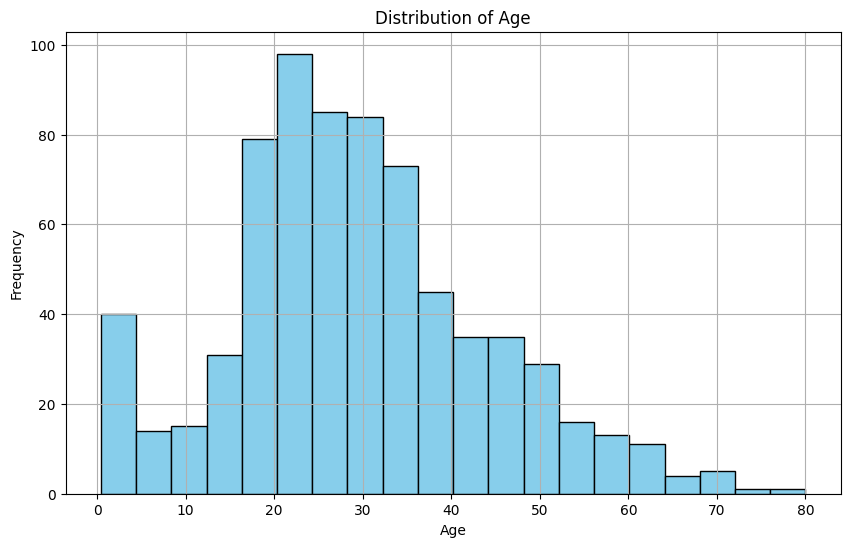

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 It should look like a normal distribution but there is an anomaly near zero. We can fill those missing values using some methods. For continuous variables, there are several methods to fill the NaN entries. One is to fill all the nulls with the mean of the feature. In this way, you ensure that the mean does not change after filling; however the standard deviation might change. Here, we will perform something different. Look at the shape of the histogram you had plotted. The graph has almost a normally distributed shape. Therefore, we would assume that the age variable has a normal distribution. Firstly, we need the mean and the standard deviation of this column. Use `describe()` function again to see the means and stds of all numerical columns.


10. (2 points) Now, we will fill the missing values with random numbers that are selected from the distribution we have. In other words, since we already know the underlying distribution, we will sample random numbers from this distribution. However, this method may randomly assign negative values also (Remember the tails of the normal distribution go to negative and positive infinities). Therefore we will set upper and lower bounds for random variables. This will introduce less bias into the dataset when you fill the missing values. At the end plot age histogram again. Use the following code for this purpose by specifying the necessary parameters.


* Specify the parameters for the normal distribution (mu: mean, sigma: standard deviation)

    `mu = (take the mean of Age)`

    `sigma = (take the standard deviation of Age)`

    `lower_bound = (take the min value of Age)`
    
    `upper_bound = (take the max value of Age)`

* Find the number of missing values

    `n_missing = df['ColumnName'].isna().sum()`

* Generate random values from a truncated normal distribution

    `a = (lower_bound - mu) / sigma`
    
    `b = (upper_bound - mu) / sigma`

* Sample from the normal distribution to fill NaNs

    `missing_values = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=n_missing).round(0)`

* Fill the NaNs in the DataFrame

    `df.loc[df['ColumnName'].isna(), 'ColumnName'] = missing_values`


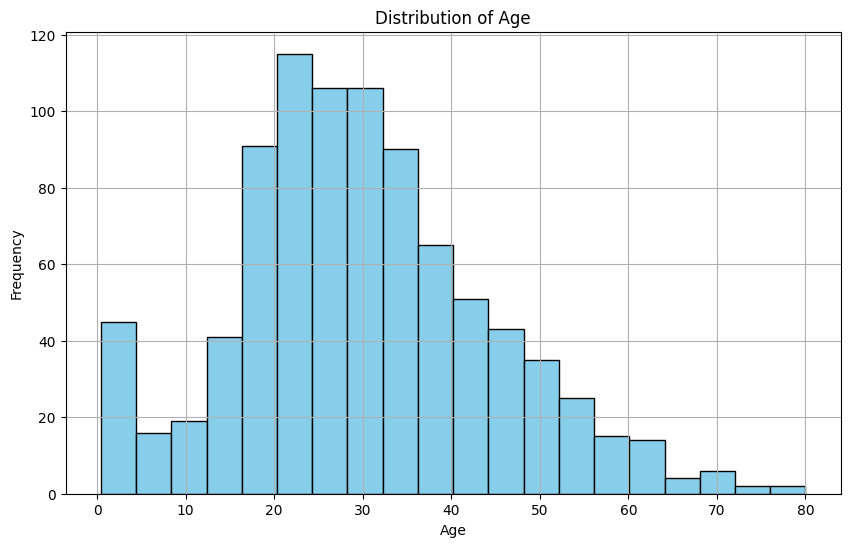

In [ ]:
import scipy.stats as stats

mu = df['Age'].mean()
sigma = df['Age'].std()
lower_bound = df['Age'].min()
upper_bound = df['Age'].max()

n_missing = df['Age'].isna().sum()

a = (lower_bound - mu) / sigma
b = (upper_bound - mu) / sigma
missing_values = stats.truncnorm.rvs(a, b, loc=mu, scale=sigma, size=n_missing).round(0)

df.loc[df['Age'].isna(), 'Age'] = missing_values

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


11. (3 points) Finally, we filled all the missing values. Now, generate a new column named "Age Category" with the following labels:

People aged between 0 and 18 will be labelled as 'Young'

People aged between 18 and 40 will be labelled as 'Middle-aged'

People aged between 40 and 81 will be labelled as 'Old'

Hint: You may do this by assigning `age_bins = [0, 18, 40, 81]` and then creating corresponding labels to use for cut function from Pandas. Other methods will also be accepted.

Print the head of the final dataframe so that we can see the new column labels.

In [ ]:
age_bins = [0, 18, 40, 81]
age_labels = ['Young', 'Middle-aged', 'Old']

df['Age Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Middle-aged
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Middle-aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Middle-aged


## **PART 1.2 - Getting Insight From Data (30 Points)**

1. (2 points) Drawing pairplots is a good start to take a glance at especially continuous features. Draw pairplots for Pclass, Age and Fare features (3x3=9 in total) and embed the survival information by coloring the data points (One color for survived, another for dead). (Hint: You should use `hue = 'Survived'` argument in `sns.pairplot()` function.)

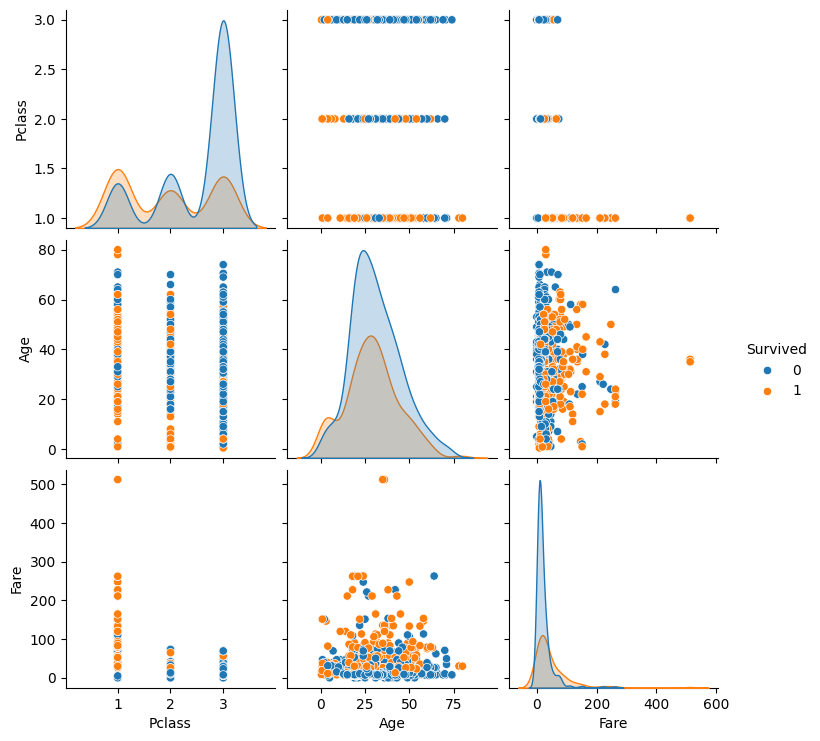

In [ ]:
sns.pairplot(df, vars=['Pclass', 'Age', 'Fare'], hue='Survived')
plt.show()


2. (2 points) Create a Correlation Heatmap matrix for all numerical features.



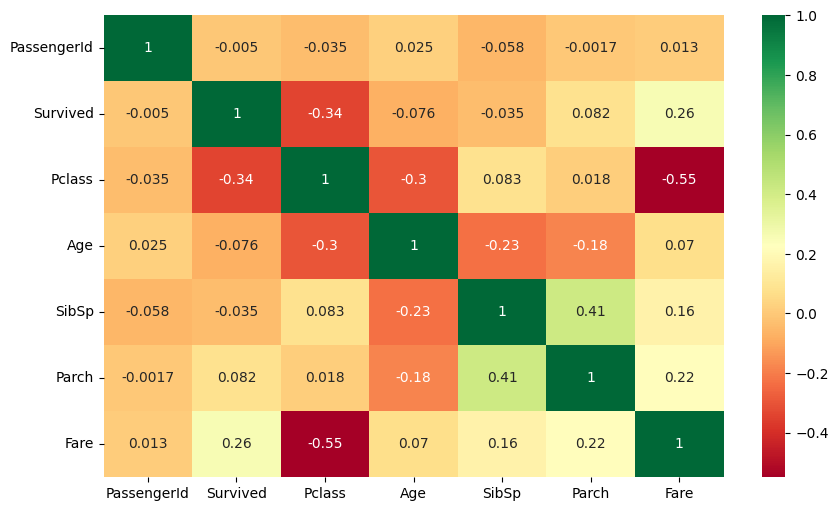

In [ ]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

3. (1 points) From the pairplots in step 1, we can see outliers in 'Fare' feature. Print all the information about them.

In [ ]:
fare_threshold = df['Fare'].quantile(0.995)
fare_outliers = df[df['Fare'] > fare_threshold]
fare_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Unknown,C,Middle-aged
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Middle-aged
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Middle-aged


4. (3 points)  Remove them and draw the boxplots to see the fare distribution for each class.

In [ ]:
fare_threshold = df['Fare'].quantile(0.995)
df_cleaned = df[df['Fare'] <= fare_threshold]

df_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,30.269336,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,14.509759,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


<ipython-input-23-d71784ad2336>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df_cleaned, palette='Set3')


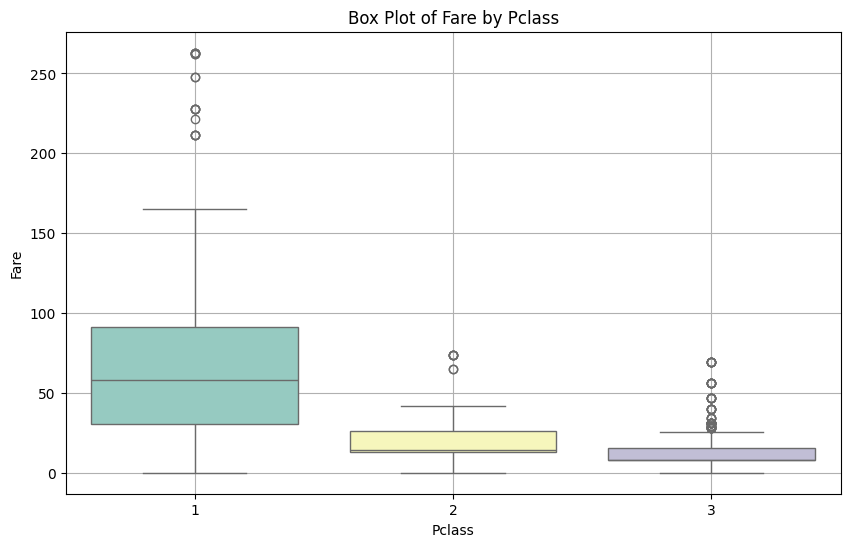

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df_cleaned, palette='Set3')
plt.title('Box Plot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


5. (1 points) How many females and males were there on the ship? Use `value_counts()` on the appropriate column and display the numbers.

In [ ]:
sex_counts = df_cleaned['Sex'].value_counts()
sex_counts_df = pd.DataFrame({'Sex': sex_counts})
sex_counts_df.index = ['male', 'female']
sex_counts_df


,Sex
male,575
female,313


6. (1 points) In a similar manner, display the number of passengers that survived/not survived and calculate the ratios.


In [ ]:
is_survived = df_cleaned['Survived'].value_counts()
is_survived_df = pd.DataFrame({'Survived': is_survived})
is_survived_df.index = ['0', '1']
is_survived_df

,Survived
0,549
1,339


7. (2 points) Run the following code to draw two similar but different countplots. Instead of those two, draw only one countplot such that for each class there should be two bins to show the survival information.



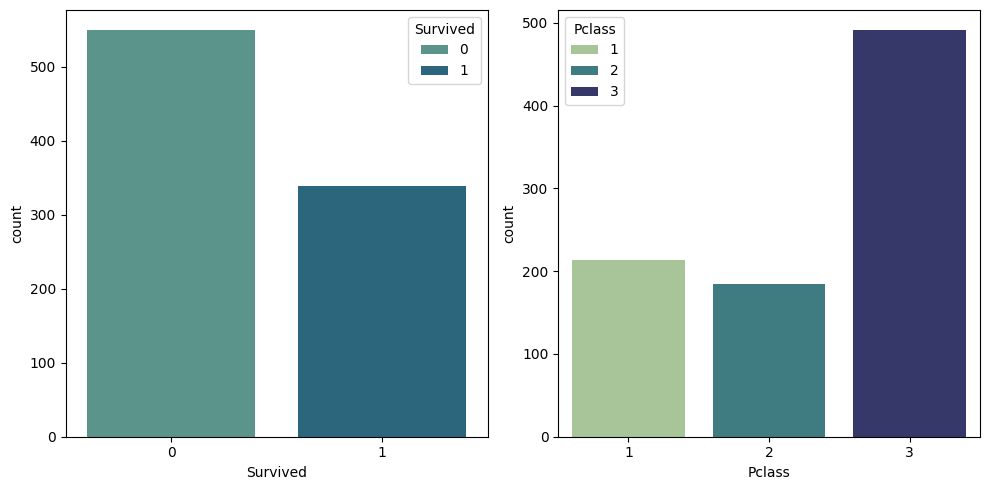

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the countplot for 'Survived'
sns.countplot(data=df_cleaned, x='Survived', hue='Survived', palette='crest', ax=axes[0])

# Plot the countplot for 'Pclass'
sns.countplot(data=df_cleaned, x='Pclass', hue='Pclass', palette='crest', ax=axes[1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

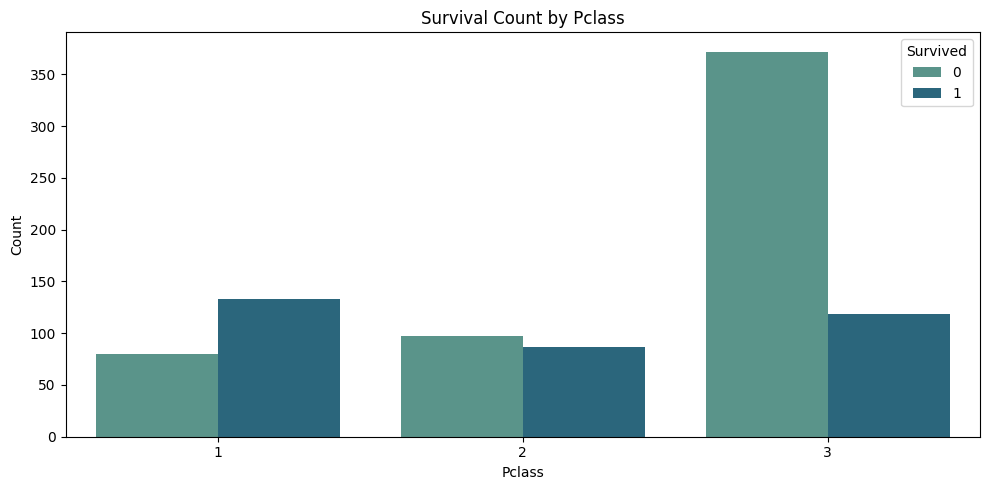

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df_cleaned, x='Pclass', hue='Survived', palette='crest', legend=False)

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Pclass')
plt.legend(title='Survived', labels=['0', '1'])
plt.tight_layout()
plt.show()


8. (2 points) Draw boxplots for 'Fare' distribution for each gender.



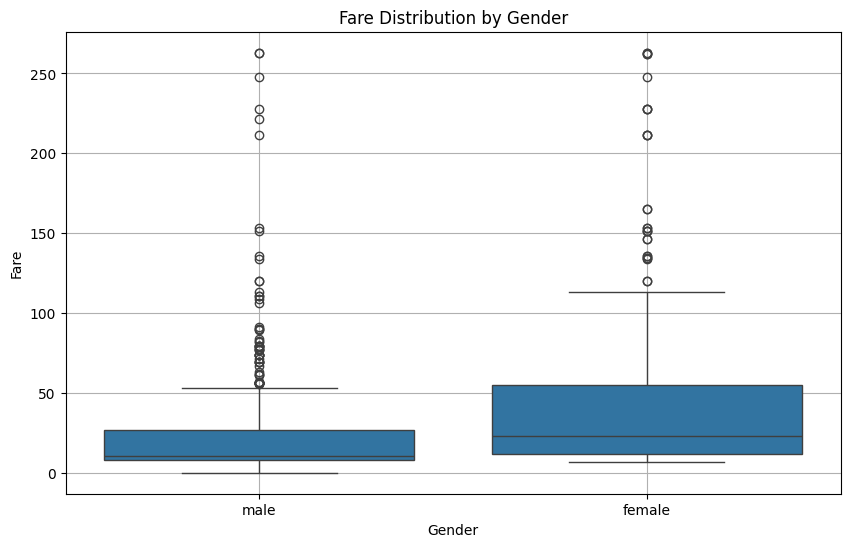

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Sex', y='Fare')
plt.title('Fare Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

9. (2 points) From the heatmap, you should see a negative correlation between Pclass and Fare (which is not a surprise). Normally, for categorical data heatmaps are not usefull to see whether there is a correlation or not. However, Pclass is an ordinal feature


Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories meaning that the categories it uses are ordered on some kind of hierarchical scale, e.g. high to low.

Therefore for these two features, we can say that there is a negative correlation between class and fare amounts. To see this trend, draw regression plot for Pclass vs Fare features.

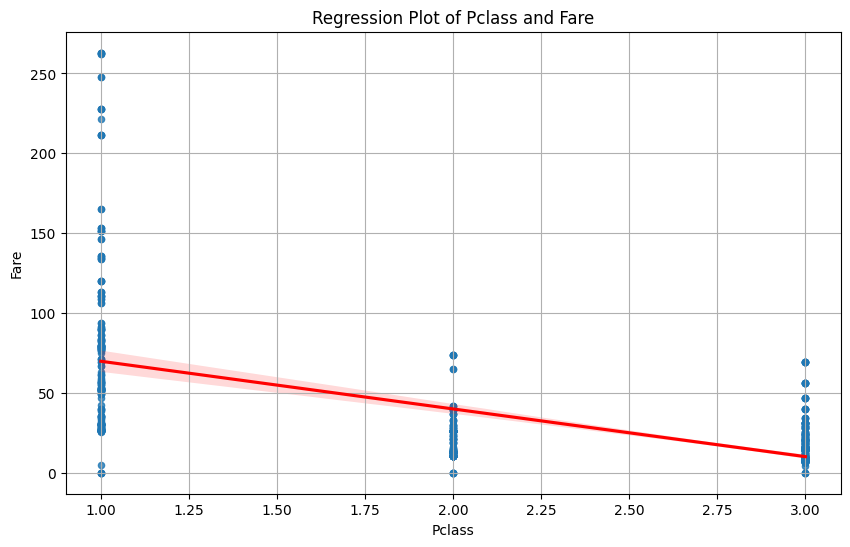

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Pclass', y='Fare', scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Regression Plot of Pclass and Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

10. (3 points) Draw violin-plots in order to see the age distribution for each gender.
How do violin plots offer insights that are not readily apparent in boxplots?




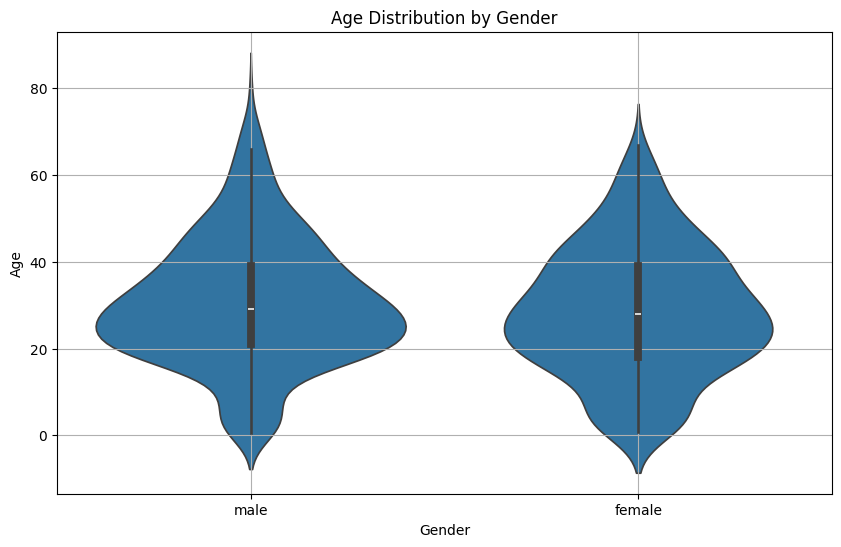

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cleaned, x='Sex', y='Age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()
#Violin plots offer insights not readily apparent in boxplots by:
#Displaying the shape and density of the data distribution, allowing for a more nuanced understanding.
#Combining summary statistics and distribution information in a single visualization.
#Representing data density across the range of values, providing additional context compared to boxplots.

11. (1 points) What is the average fare for categories survived/not survived? Calculate using code. `Hint: use df.groupby(--)[--].appropriate_function()`

In [ ]:
average_fare_survived = df_cleaned.groupby('Survived')['Fare'].mean()
average_fare_survived_df = pd.DataFrame({'Fare': average_fare_survived})
average_fare_survived.index = ['0','1']
average_fare_survived_df

,Fare
Survived,
0,22.117887
1,44.289799


12. (2 points) Calculate the survival rates for each age group (Remember you have created three age groups based on ages).

In [ ]:
age_group_survival = df_cleaned.groupby('Age Category')['Survived'].mean()
age_group_survival_rounded = (age_group_survival * 100).round(2)
age_group_survival_df = pd.DataFrame({'0': age_group_survival_rounded})
age_group_survival.index = ['Young','Middle-aged','Old']
print("Survival Rates for Each Age Group: ")
age_group_survival_df

Survival Rates for Each Age Group: 


,0
Age Category,
Young,50.32
Middle-aged,35.21
Old,36.53


13. (3 points) Now take a look at the age distribution plot you have plotted. There was an unusual bump near zero. So, it is clear that there were more children than expected (expected in the sense of distribution). Let's say we want to analyze those smaller aged passengers.

 According to CDC, babies under 1 are called as infants and kids ages 1 to 3 are considered toddlers, while 3- to 5-year-olds are preschoolers. Using this information, first define age categories as in the following:


In [ ]:
infants = df_cleaned[(df_cleaned['Age'] >= 0) & (df_cleaned['Age'] < 1)]
toddlers = df_cleaned[(df_cleaned['Age'] >= 1) & (df_cleaned['Age'] < 3)]
preschoolers = df_cleaned[(df_cleaned['Age'] >= 3) & (df_cleaned['Age'] < 5)]
schoolagedchilds = df_cleaned[(df_cleaned['Age'] >= 5) & (df_cleaned['Age'] < 12)]

(13. Cont'd) For each category, find survival rates and plot Seaborn's Countplot that shows age groups in x axis and counts of survived and dead children in y axis separately. Compare the survival rates of those children with the overall survival rates.

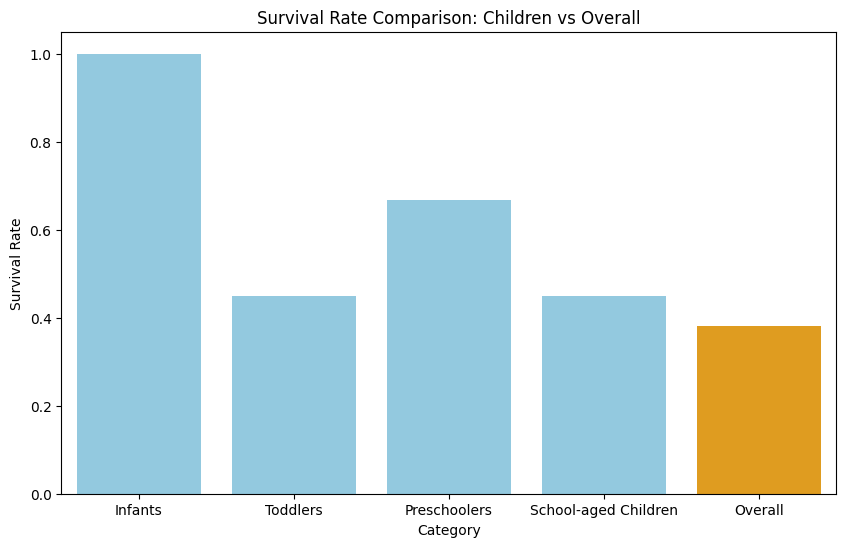

In [ ]:
infants_survival_rate = infants['Survived'].mean()
toddlers_survival_rate = toddlers['Survived'].mean()
preschoolers_survival_rate = preschoolers['Survived'].mean()
schoolagedchilds_survival_rate = schoolagedchilds['Survived'].mean()

overall_survival_rate = df_cleaned['Survived'].mean()

child_categories = {
    'Infants': infants_survival_rate,
    'Toddlers': toddlers_survival_rate,
    'Preschoolers': preschoolers_survival_rate,
    'School-aged Children': schoolagedchilds_survival_rate
}

data = list(child_categories.values()) + [overall_survival_rate]
labels = list(child_categories.keys()) + ['Overall']
colors = ['skyblue'] * len(child_categories) + ['orange']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=data, palette=colors, hue=labels, dodge=False)
plt.title('Survival Rate Comparison: Children vs Overall')
plt.xlabel('Category')
plt.ylabel('Survival Rate')

plt.show()


14. (2 points) Check for the relationship between pclass and survival rates.

First calculate survival rates for each passanger class. `Hint: use df.groupby(--)[--].appropriate_function()`

Then, make a barplot with classes on X axis and Survival Ratio on Y axis. Use "sns.barplot()"

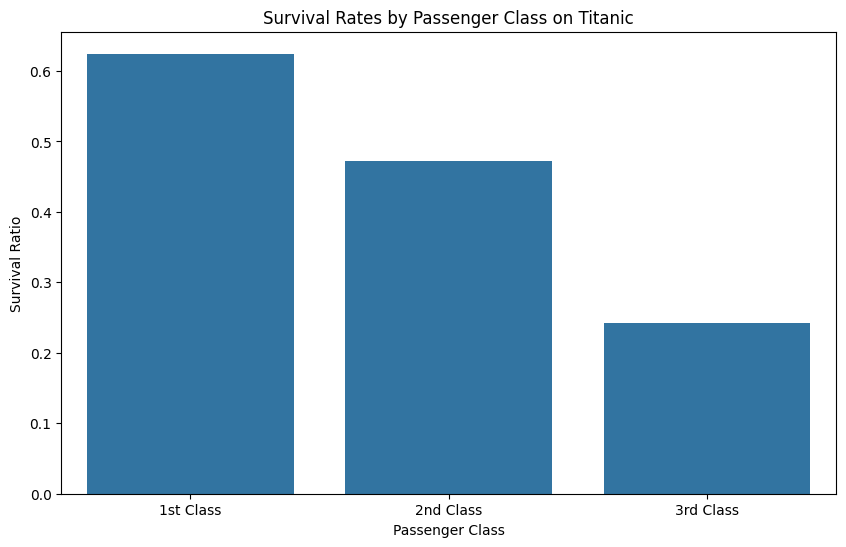

In [ ]:
class_survival_rates = df_cleaned.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_survival_rates.index, y=class_survival_rates.values)
plt.title('Survival Rates by Passenger Class on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Ratio')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

15. (1 points) Now let's look at the feature SibSip. SibSip is the number of siblings or spouses the passenger had aboard the Titanic.

Now try to produce a crosstab. `Use .crosstab() function.`

In [ ]:
sibsp_survived_cross = pd.crosstab(df_cleaned['SibSp'], df_cleaned['Survived'])
sibsp_survived_cross

Survived,0,1
SibSp,,
0,398,207
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


16. (2 points) First calculate survival rates by passenger class and gender. `Use df.groupby(['---', '---'])['---']`

Then, you may use `.sns.pointplot()` to plot the relationship between passenger class (Pclass), survival rate, and gender.

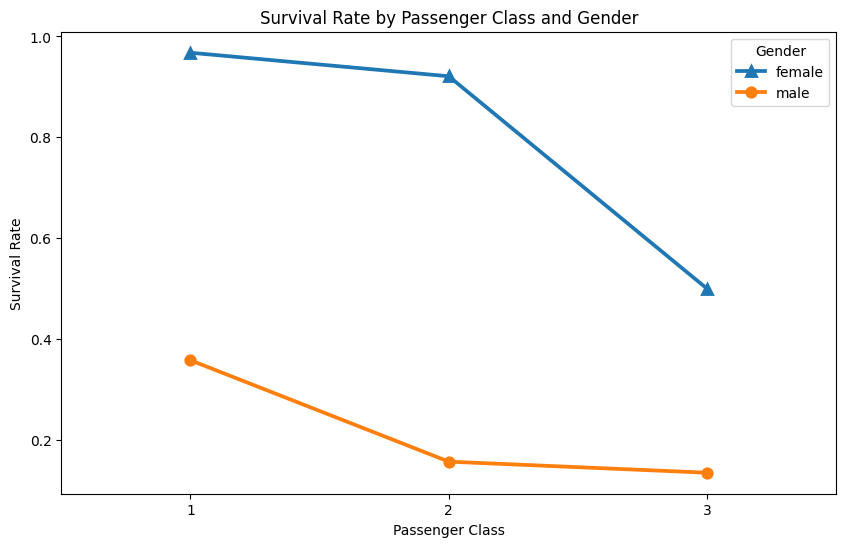

In [ ]:
survival_rates = df_cleaned.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=survival_rates, x='Pclass', y='Survived', hue='Sex', markers=['^', 'o'])
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()



## **PART 1.3 - Conclusions (5 Points)**




Write down at least 5 key findings that you learned from your analysis on Titanic dataset.

Did you find any useful or interesting information?

Check out the tables, plots and other outputs you have produced in the previous sections. Write what you have learned from those.

Keep it concise!

At least one comment should be from one of the pairplots you plotted.


In [ ]:
# 1)Passengers in first class had significantly higher survival rates compared to those in second and third class.
#
# 2)Females had a much higher survival rate compared to males across all passenger classes.
#
# 3)Children (infants, toddlers, and preschoolers) had higher survival rates compared to other age groups.
#
# 4)Passengers with fewer siblings or spouses aboard (SibSp = 0) had a higher survival rate compared to those with more siblings or spouses.
#
# 5)There was a negative correlation between passenger class and fare, indicating that higher-class tickets were associated with higher fares.
#

---

> # **PART 2 - E.D.A. on Sleep Efficiency Dataset**

### **Dataset Description:**
The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded.

The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

Now check out the data dictionary below to get to know more about the dataset.

**Data Dictionary:**

Variable    | Definition	Key |
------------|-------------------|
ID |a unique identifier for each test subject|
Age	|age of the test subject|
Gender    |male or female
Bedtime|the time the test subject goes to bed each night|
Wakeup time|the time the test subject wakes up each morning|
Sleep duration|the total amount of time the test subject slept (in hours)
Sleep efficiency|a measure of the proportion of time in bed spent asleep
REM sleep percentage|the percentage of total sleep time spent in REM sleep.
Deep sleep percentage|the percentage of total sleep time spent in deep sleep
Light sleep percentage|the percentage of total sleep time spent in light sleep

## **PART 2.1 - Loading and Cleaning The Data (15 Points)**


First, fetch the dataset from Kaggle. Make sure that your "KAGGLE_KEY" AND "KAGGLE_USERNAME" keys are stored and has notebook access in the secrets tab of Google Colab.

In [ ]:
from google.colab import  userdata
import os

os.environ['KAGGLE_USERNAME'] = 'mertcaneken'
os.environ['KAGGLE_KEY'] = '52ba35f6b0ba9b29bcb9b29f5d54e591'

In [ ]:
! kaggle datasets download equilibriumm/sleep-efficiency -f Sleep_Efficiency.csv

  0% 0.00/40.4k [00:00<?, ?B/s]
100% 40.4k/40.4k [00:00<00:00, 45.0MB/s]


1. (2 points) Now let's start our exploratory data analysis.

First import NumPy, Pandas, Matplotlib, Seaborn and other necesarry libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You should see Sleep_Efficiency.csv on the files tab. Read the .csv file and save it into a Pandas DataFrame. Use `pd.read_csv()` function. Make sure that you don't name your DataFrame the same as in the previous section.

In [ ]:
df_sleep_efficiency = pd.read_csv('Sleep_Efficiency.csv')

2. (2 Points) Take a look at the data briefly and print the number of null variables
 in each column.


In [ ]:
df_sleep_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [ ]:
df_a = pd.DataFrame(df_sleep_efficiency.isnull().sum())
df_a

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


3. (7 Points) In total four columns have NaN values. Fill the Caffeine consumption and Alcohol consumption missing values with .mode() function and the other columns with random variables.

In [ ]:
for column in df_sleep_efficiency.columns:
    if column in ['Caffeine consumption', 'Alcohol consumption']:
      df_sleep_efficiency[f'{column}'].fillna(df_sleep_efficiency[f'{column}'].mode()[0], inplace=True)
    elif column not in ['Caffeine consumption', 'Alcohol consumption'] and df_sleep_efficiency[f'{column}'].isnull().sum() > 0:
      mean = df_sleep_efficiency[f'{column}'].mean()
      std = df_sleep_efficiency[f'{column}'].std()
      random_values = np.random.normal(mean, std, size=df_sleep_efficiency[column].isnull().sum())
      df_sleep_efficiency.loc[df_sleep_efficiency[column].isnull(), column] = random_values
df_sleep_efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


Now, check the number of null variables in each column to ensure that we have no more null variables.

In [ ]:
df_b = pd.DataFrame(df_sleep_efficiency.isnull().sum())
df_b

,0
ID,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0


4. (4 Points) Create a new column as 'Age group' and assign a category to each entry with the following age ranges:

Child: 0 to 14 years old (inclusive upper bound)

Youth: 15 to 24 years old (inclusive upper bound)

Adult: 25 to 64 years old (inclusive upper bound)

Senior: 65 years old and above

In [ ]:
age_ranges = [(0, 14), (15, 24), (25, 64), (65, np.inf)]
age_labels = ['Child', 'Youth', 'Adult', 'Senior']

df_sleep_efficiency['Age group'] = pd.cut(df_sleep_efficiency['Age'], bins=[0, 14, 24, 64, np.inf], labels=age_labels, right=False)
df_sleep_efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age group
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Senior
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Senior
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Adult
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,Adult
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Adult


## **PART 2.2 - Getting Insight From Data (30 Points)**


1. (3 points)
Draw pairplots for columns: 'Age group', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Exercise frequency' with hue= 'Age group' parameter.


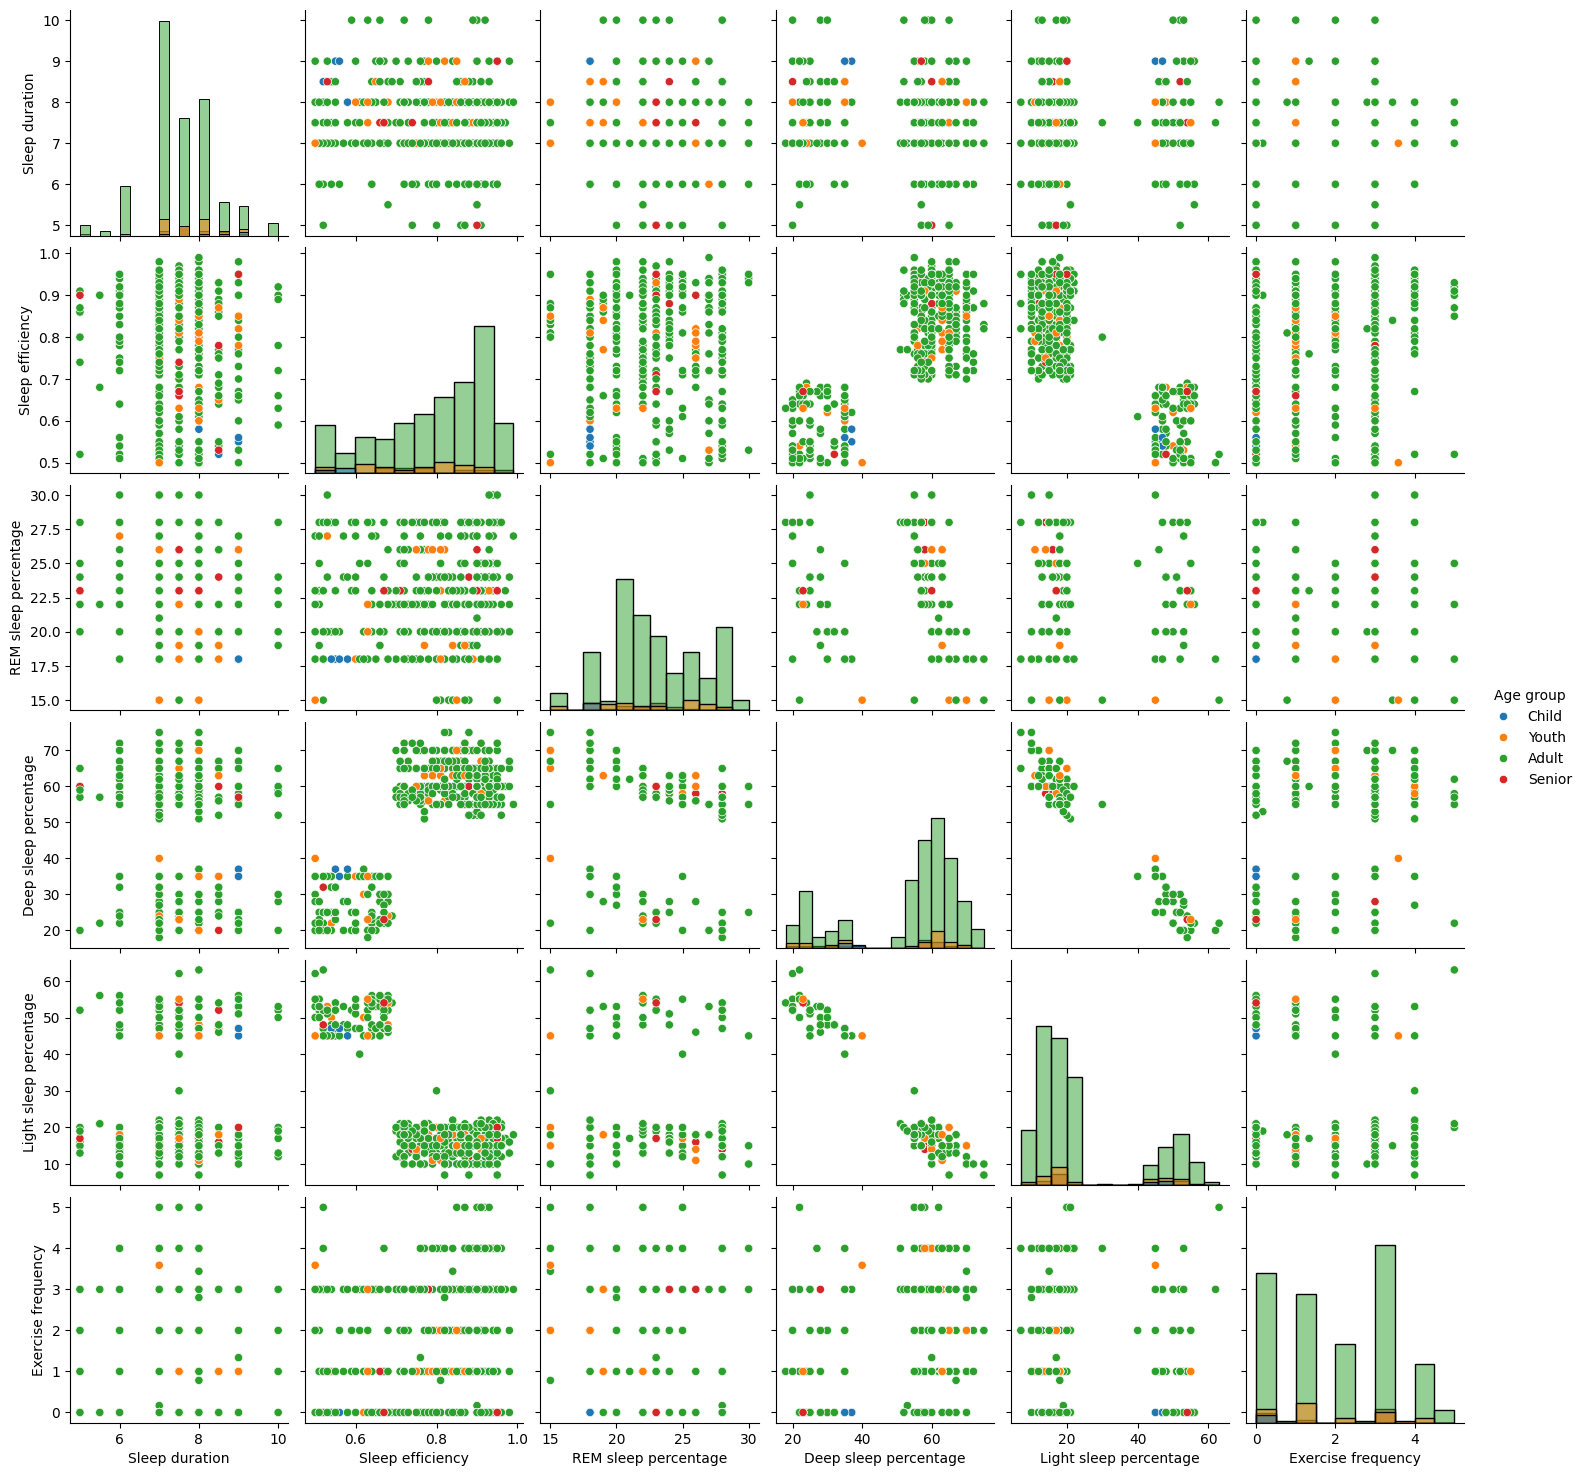

In [ ]:
columns_for_pairplot = ['Age group', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
                        'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
                        'Light sleep percentage', 'Exercise frequency']
sns.pairplot(df_sleep_efficiency[columns_for_pairplot], hue='Age group', diag_kind='hist', markers='o')
plt.show()

2. (3 points) Recall that one age group is very dominant in the data. Now calculate the number of entries and percentages of each age group. (Child, Youth, Adult, Senior)

In [ ]:
total_rows = df_sleep_efficiency.shape[0]
age_group_percentages = age_group_counts / len(df_sleep_efficiency) * 100

print('Number of rows and percentage of each age group:')
print(f'Total Rows: {total_rows}')
age_group_counts = df_sleep_efficiency['Age group'].value_counts()
age_group_counts_df = pd.DataFrame({'Age group': age_group_counts})
age_group_counts_df.index = ['Adult', 'Youth', 'Senior', 'Child']
age_group_percentages_df = pd.DataFrame({'Age group': age_group_percentages})
age_group_percentages_df.index = ['Adult', 'Youth', 'Senior', 'Child']
age_group_counts_df

Number of rows and percentage of each age group:
Total Rows: 452


,Age group
Adult,394
Youth,36
Senior,17
Child,5


In [ ]:
age_group_percentages_df

,Age group
Adult,87.168142
Youth,7.964602
Senior,3.761062
Child,1.106195


3. (2 points) Since the classes are imbalanced, filter and continue with only 'Adult' data.

In [ ]:
df_sleep_efficiency_adult = df_sleep_efficiency[df_sleep_efficiency['Age group'] == 'Adult']
df_sleep_efficiency_adult.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age group
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Adult
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,Adult
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Adult
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,0.0,0.0,No,1.0,Adult
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0,Adult


4. (2 points) Draw pairplots again but now with hue = 'Gender' parameter.

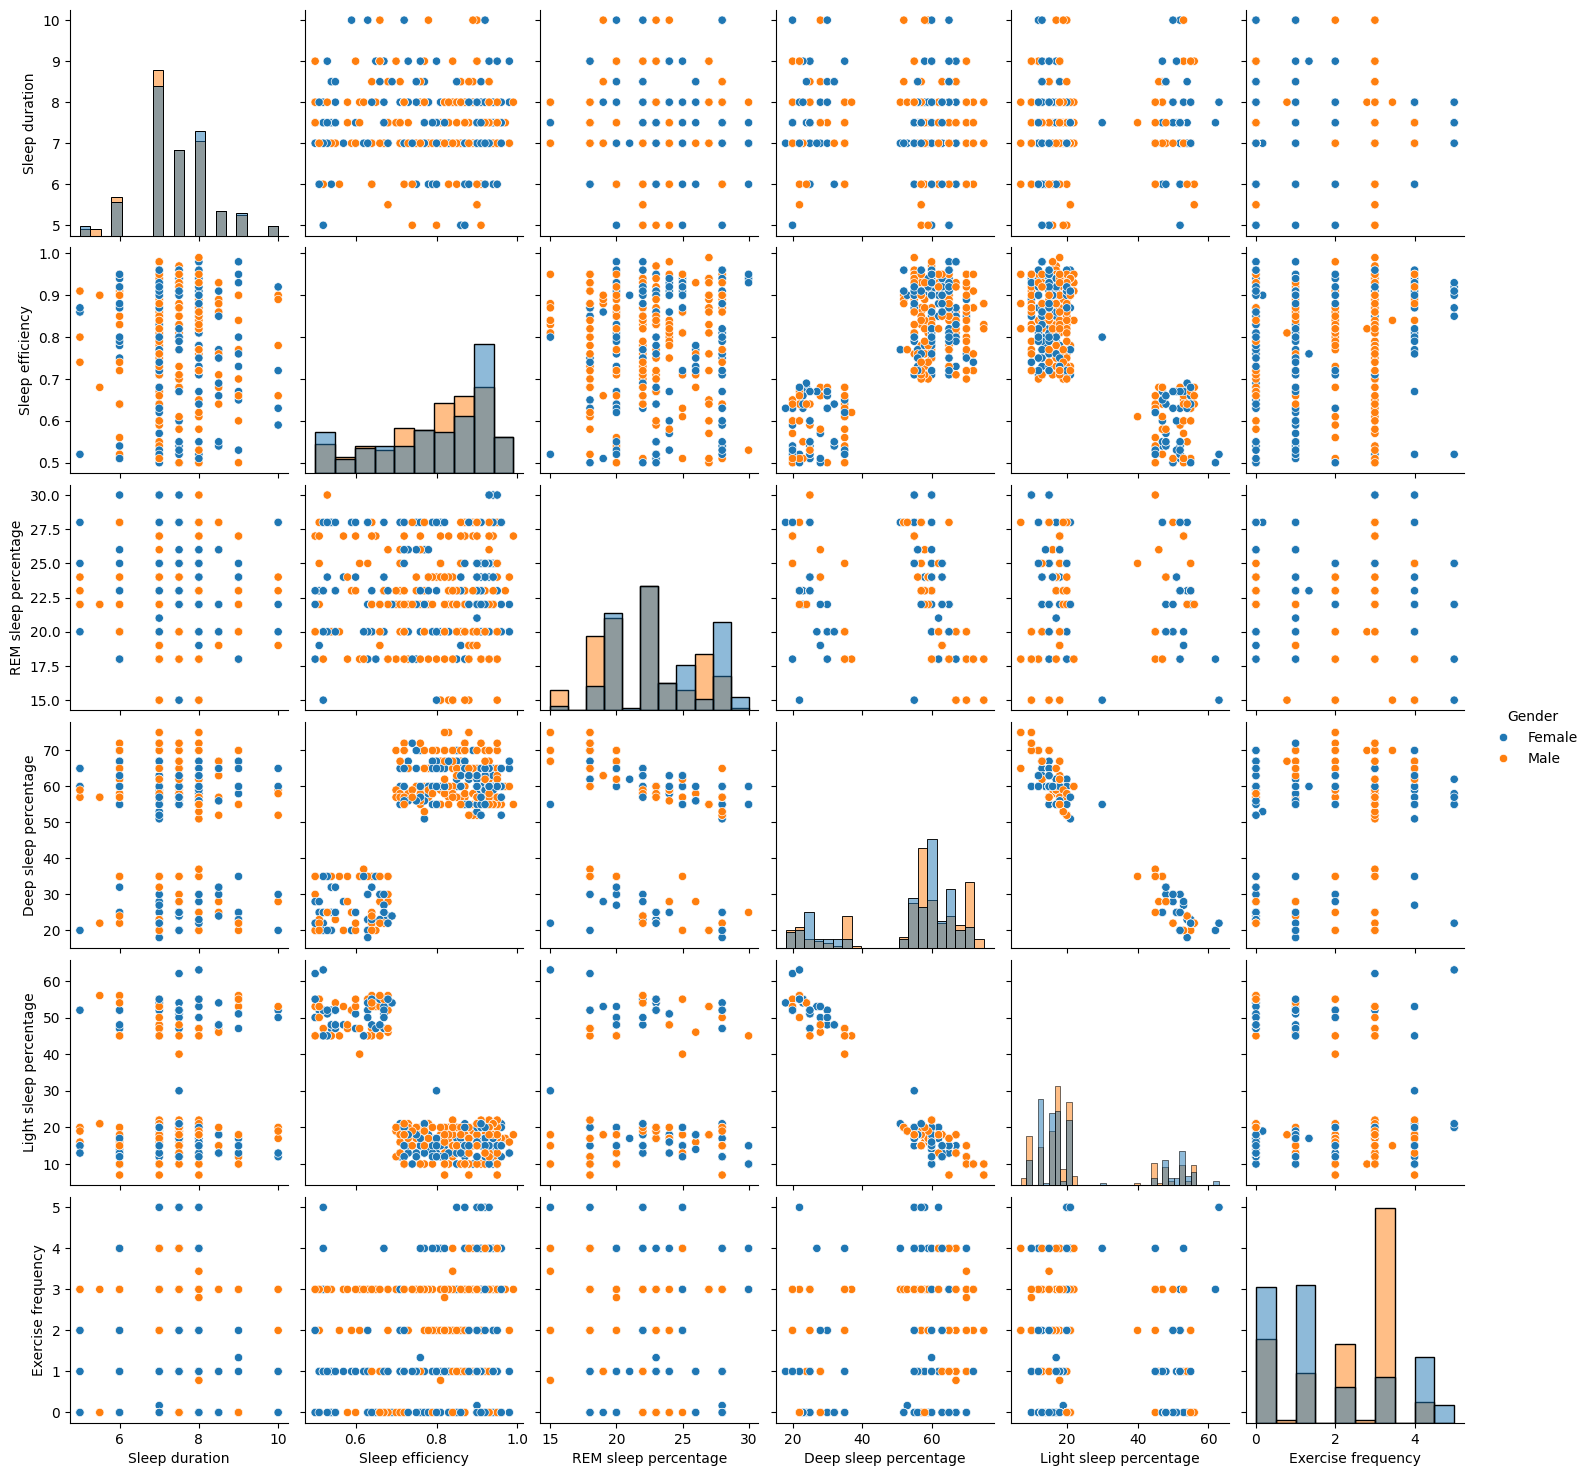

In [ ]:
sns.pairplot(df_sleep_efficiency_adult[columns_for_pairplot], hue='Gender', diag_kind='hist', markers='o')

plt.show()

5. (5 points) You talked to a sleep specialist and he made a definition of 'good sleep'. According to the information you had, you will assign sleep quality score for each person. For this purpose, you will give one point for each of these if the individual:

* Getting at least 7 hours of sleep (x >= 7)
* Having deep sleep between 13% and 23% (x >= 13 and x <= 23)
* Having light sleep between 45% and 55% (x >= 45 and x <= 55)
* Waking up 1 or less times (x <= 1)
* Being asleep for at least 85% of the night (x >= .85)

(For example if a person satisfies all the conditions above will get 5 point which indicates that his sleep quality is great.)

Now create a 'Sleep quality' column and fill the column according to the information you have.

In [ ]:
# Create a function to calculate sleep quality score
def calculate_sleep_quality(row):
    score = 0

    # Check conditions and increment score accordingly
    if row['Sleep duration'] >= 7:
        score += 1
    if 13 <= row['Deep sleep percentage'] <= 23:
        score += 1
    if 45 <= row['Light sleep percentage'] <= 55:
        score += 1
    if row['Awakenings'] <= 1:
        score += 1
    if row['Sleep efficiency'] >= 0.85:
        score += 1

    return score

# Create 'Sleep quality' column
df_sleep_efficiency_adult['Sleep quality'] = df_sleep_efficiency_adult.apply(calculate_sleep_quality, axis=1)

# Create sleep quality grade columns
df_sleep_efficiency_adult['sleep_duration_grade'] = (df_sleep_efficiency_adult['Sleep duration'] >= 7).astype(int)
df_sleep_efficiency_adult['deep_sleep_grade'] = ((df_sleep_efficiency_adult['Deep sleep percentage'] >= 13) &
                                                  (df_sleep_efficiency_adult['Deep sleep percentage'] <= 23)).astype(int)
df_sleep_efficiency_adult['light_sleep_grade'] = ((df_sleep_efficiency_adult['Light sleep percentage'] >= 45) &
                                                   (df_sleep_efficiency_adult['Light sleep percentage'] <= 55)).astype(int)
df_sleep_efficiency_adult['awakenings_grade'] = (df_sleep_efficiency_adult['Awakenings'] <= 1).astype(int)
df_sleep_efficiency_adult['sleep_efficiency_grade'] = (df_sleep_efficiency_adult['Sleep efficiency'] >= 0.85).astype(int)

# Reorder columns to place 'Sleep quality' column at the end
df_sleep_efficiency_adult = df_sleep_efficiency_adult[[col for col in df_sleep_efficiency_adult if col != 'Sleep quality'] + ['Sleep quality']]

# Print the head of the DataFrame to verify the changes
df_sleep_efficiency_adult.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,...,Alcohol consumption,Smoking status,Exercise frequency,Age group,sleep_duration_grade,deep_sleep_grade,light_sleep_grade,awakenings_grade,sleep_efficiency_grade,Sleep quality
2,3.0,40.0,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20.0,70.0,10.0,...,0.0,No,3.0,Adult,1,0,0,1,1,3
3,4.0,40.0,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23.0,25.0,52.0,...,5.0,Yes,1.0,Adult,0,0,1,0,0,1
4,5.0,57.0,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27.0,55.0,18.0,...,3.0,No,3.0,Adult,1,0,0,0,0,1
5,6.0,36.0,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23.0,60.0,17.0,...,0.0,No,1.0,Adult,1,0,0,1,1,3
6,7.0,27.0,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28.0,25.0,47.0,...,0.0,Yes,1.0,Adult,0,0,1,0,0,1


6. (2 points) Draw countplot for 'Sleep quality' column.

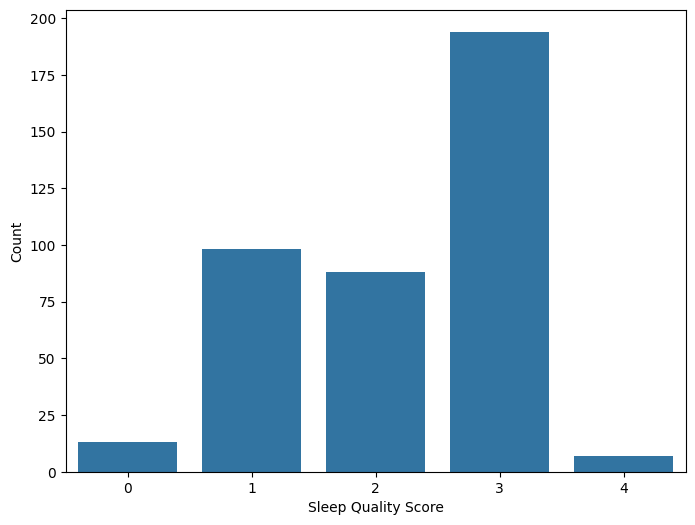

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_sleep_efficiency_adult, x='Sleep quality')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Count')
plt.show()

7. (3 points) Print the summary statistics (use .describe() function) for the entries that have the most seen sleep quality score. (Be careful, you will not give statistics for 'Sleep quality' column. You will filter the whole data, get the entries for the most seen 'Sleep quality' score, and then get the summary statistics for this subset.

In [ ]:
most_common_score = df_sleep_efficiency_adult['Sleep quality'].mode().values[0]

most_common_score_entries = df_sleep_efficiency_adult[df_sleep_efficiency_adult['Sleep quality'] == most_common_score]

most_common_score_entries.drop(columns='Sleep quality').describe()


,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,sleep_duration_grade,deep_sleep_grade,light_sleep_grade,awakenings_grade,sleep_efficiency_grade
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.0,194.000000,194.000000,194.000000,194.000000
mean,232.788660,41.453608,7.621134,0.852887,22.922680,54.515464,22.561856,0.781090,23.324742,0.969072,2.083345,1.0,0.108247,0.170103,0.902062,0.819588
std,131.020513,10.923209,0.671026,0.133191,3.498216,14.939681,14.254125,0.907541,31.175630,1.478366,1.503029,0.0,0.311497,0.376695,0.298000,0.385525
min,3.000000,24.000000,7.000000,0.500000,15.000000,20.000000,7.000000,-0.033511,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,118.250000,31.000000,7.000000,0.860000,20.000000,55.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,245.000000,41.000000,7.500000,0.900000,23.000000,60.000000,18.000000,1.000000,0.000000,0.000000,2.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,343.250000,50.750000,8.000000,0.930000,25.000000,63.000000,20.000000,1.000000,50.000000,2.000000,3.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,450.000000,63.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000


8. (3 points) Draw catplots showing sleep quality score in x axis and one of the following measurements in y axis: 'Sleep duration', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Sleep efficiency'

(You will print 5 plots separately.)

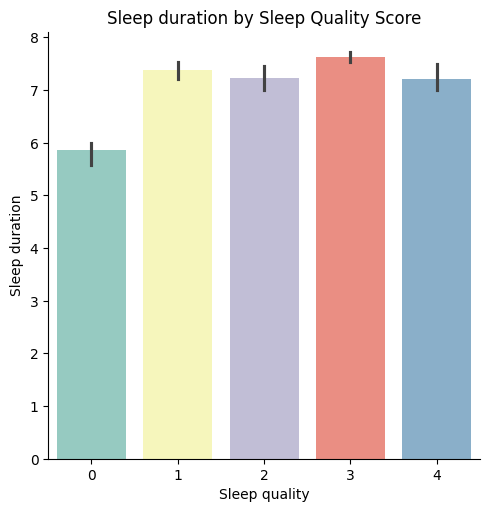

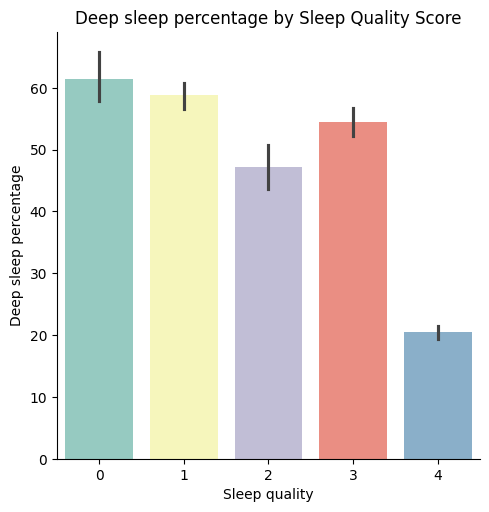

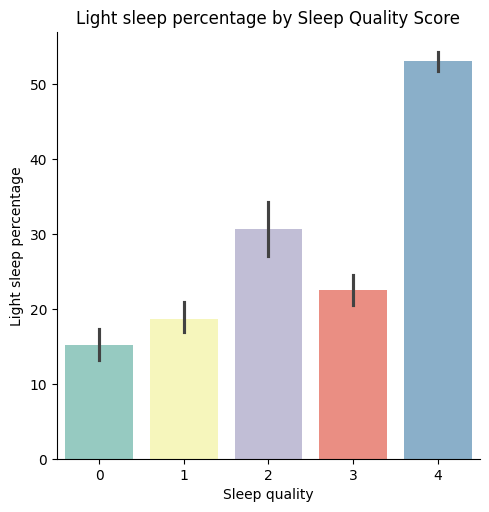

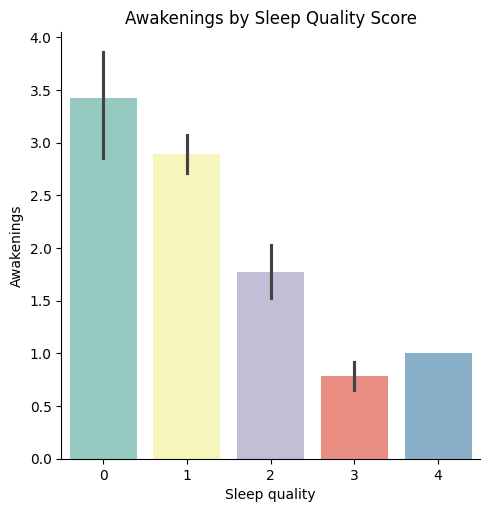

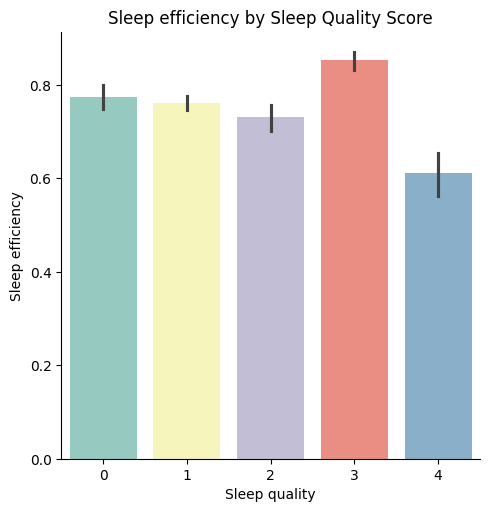

In [ ]:
measurements = ['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Sleep efficiency']

for measurement in measurements:
    sns.catplot(x='Sleep quality', y=measurement, data=df_sleep_efficiency_adult, kind='bar', hue='Sleep quality', palette='Set3', legend=False)
    plt.title(f'{measurement} by Sleep Quality Score')
    plt.show()


9. (4 points) From the heatmap we can see that there is a high positive correlation between Deep sleep percentage and Sleep efficiency which is expected: The more you sleep deep, the better sleep efficiency.

Now to illustrate an example for negative correlation draw a regression plot between Alcohol consumption (in x axis) and Sleep efficiency (in y axis).

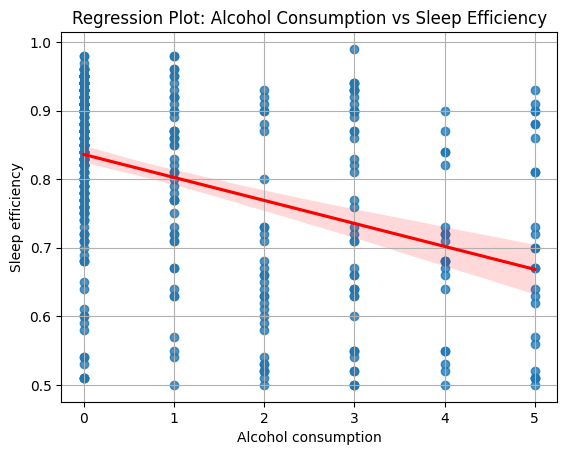

In [ ]:
sns.regplot(x='Alcohol consumption', y='Sleep efficiency', data=df_sleep_efficiency_adult, line_kws={'color': 'red'})
plt.title('Regression Plot: Alcohol Consumption vs Sleep Efficiency')
plt.grid(True)
plt.show()

10. (3 points) Plot a boxplot of sleep efficiency by smoking status.

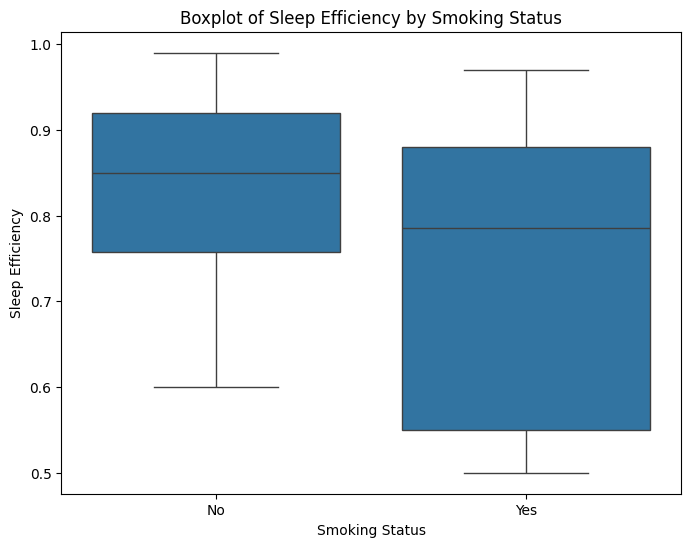

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Smoking status', y='Sleep efficiency', data=df_sleep_efficiency_adult)
plt.title('Boxplot of Sleep Efficiency by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Sleep Efficiency')
plt.show()

## **PART 2.3 - Conclusions (5 Points)**

Write down at least 5 key findings that you learned from your analysis on Sleep Efficiency dataset.

Did you find any useful or interesting information?

Check out the tables, plots and other outputs you have produced in the previous sections. Write what you have learned from those.

At least one comment should be derived from pairplots you have drown.

Keep it concise!

In [ ]:
# 1)Sleep efficiency tends to increase with age, with older individuals generally having higher sleep efficiency compared to younger ones.

# 2) There is a positive correlation between deep sleep percentage and sleep efficiency,
# indicating that higher deep sleep percentage tends to lead to better overall sleep efficiency.

# 3) Light sleep percentage and awakenings appear to have a negative correlation with sleep efficiency,
# suggesting that higher levels of light sleep and more frequent awakenings may be associated with lower sleep efficiency.

# 4) Individuals who smoke tend to have lower sleep efficiency compared to non-smokers, as indicated by the boxplot analysis.

# 5)Sleep quality scores based on predefined criteria can vary widely among individuals,
# with some meeting all criteria for good sleep quality while others do not.